# Modelos de regressão

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

## Regressão linear simples

Vimos que para a regressão linear simples, temos o modelo: $Y \approx \beta_0 + \beta_1 X$

Vamos implementar esse método a seguir. Inicialmente, definimos os dados.

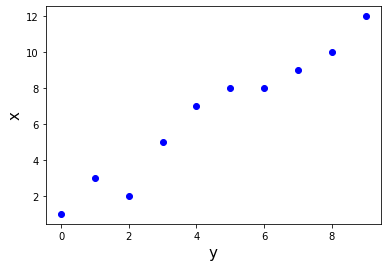

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# define os dados
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
plt.plot(x, y, 'bo')
plt.ylabel("x", fontsize = 15)
plt.xlabel("y", fontsize = 15)
plt.show(True)  

A seguir, implementamos uma função para calcular os coeficientes.

Estimando os coeficiente através do método dos mínimos quadrados, obtemos:
    $$
    \begin{cases}
    \hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma_{xy}}{\sigma_{xx}}\\
    \hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
    \end{cases}
    $$

In [2]:
from statistics import variance 
import math 

def estimate_coef(x, y): 
    # número de observações/pontos
    n = np.size(x) 
  
    # médias de x e y
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

# função para mostrar os dados e o ajuste linear
def plot_regression_line(x, y, b): 
    # mostra os dados
    plt.scatter(x, y, color = "b", marker = "o", s = 50) 
  
    # prediz os valores
    y_pred = b[0] + b[1]*x 
  
    # mostra a reta de regressão
    plt.plot(x, y_pred, color = "r") 
  
    plt.xlabel('x', fontsize = 15) 
    plt.ylabel('y', fontsize = 15) 
    plt.show(True) 

Assim, aplicando ao conjunto de dados:

Estimated coefficients:
b_0 = 1.2363636363636363  
b_1 = 1.1696969696969697


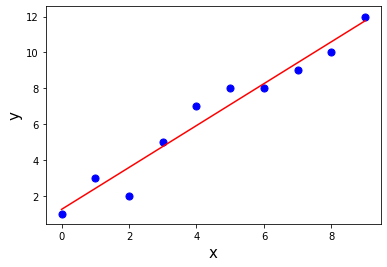

In [9]:
import numpy as np

# estima os coeficientes
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
# mostra o ajuste linear
plot_regression_line(x, y, b) 

Para quantificar a acurácia do modelo, usamos o erro padrão residual (residual standard error):
$$
RSE = \sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

In [10]:
#funcao que calcula o RSE
def RSE(x,y,b):
    n = len(y)
    RSE = 0
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        RSE = RSE + (y[i]-y_pred)**2
    RSE = math.sqrt(RSE/(n-2))
    return RSE
print('RSE:', RSE(x,y,b))

RSE: 0.8384690232980003


Outra medida importante é o coeficiente R2, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X.
$$
R^2 = 1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}, \quad 0\leq R^2\leq 1
$$

In [11]:
def R2(x,y,b):
    n = len(y)
    c1 = 0
    c2 = 0
    ym = np.mean(y)
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        c1 = c1 + (y[i]-y_pred)**2
        c2 = c2 + (y[i]-ym)**2
    R2 = 1 - c1/c2
    return R2

print('R2:', R2(x,y,b))

R2: 0.952538038613988


Quanto mais próximo de um, melhor é o ajuste da regressão linear.

## Regressão linear múltipla

Para o caso multivariado, vimos que a estimação dos coeficientes pelo método dos mínimos quadrados resulta na relação:
$$
\beta = (\text{X}^T \text{X})^{-1} \text{X}^T \text{y}
$$
onde
$$
\text{X} = \begin{pmatrix}
1 & x_{11} &x_{12} &\ldots &x_{1d} \\
1 & x_{21} &x_{22} &\ldots &x_{2d} \\
\ldots & \ldots &\ldots &\ldots &\ldots \\
1 & x_{n1} &x_{n2} &\ldots &x_{nd} \\
\end{pmatrix}
$$

Vamos considerar dados reais e a biblioteca scikit-learn. Inicialmente, carregamos os dados.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# le os dados
data = pd.read_csv('data/BostonHousing.csv', header=(0))
# valor a ser predito
ylabel = data.columns[-1]
print("Número de linhas e colunas:", data.shape)
data.head(10)

Número de linhas e colunas: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Transformos os dados para o formato numpy para facilitar o acesso.

In [13]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Selecionamos os conjuntos de teste e treinamento, sendo que $p$% dos dados serão usados como teste e (1-p)%, como treinamento.

In [14]:
from sklearn.model_selection import train_test_split
# divide o conjunto em treinamento e teste
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

O ajuste dos coeficientes da regressão linear é feito usando apenas o conjunto de treinamento.

In [15]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

Notem que como temos várias variáveis, não é possível mostrar os resultados em mais de três dimensões. Nesse caso, uma maneira de visualizar a precisão na predição é graficar os valores reais versus as predições, como mostramos abaixo.

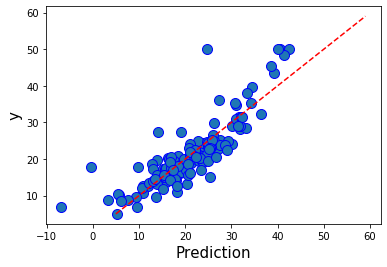

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

Quanto mais próximo da reta em vermelho, melhor será a predição, pois essa reta representa o caso em que $\hat{y} = y$.

Para quantificarmos o ajuste, calculamos o coeficiente R2.

In [17]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7112260057484894


## Variáveis não lineares

Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros. Por exemplo, modelo abaixo ainda é linear nos parâmetros: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

Vamos considerar um exemplo.

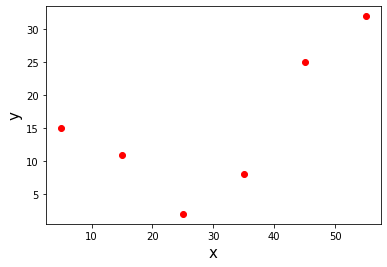

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([15, 11, 2, 8, 25, 32])
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

Geramos os dados quadráticos inserindo mais uma coluna.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
transformer = PolynomialFeatures(degree=2, include_bias=False)
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)

Dados originais:
 [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
Novos dados:
 [[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


O modelo será dado por: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

Vamos aplicar a regressão linear:

In [20]:
model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)

Mostrando os valores preditos ($\hat{y}$) e os originais ($y$):

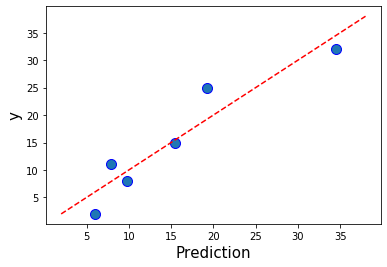

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Mostrando os valores no gráfico original:

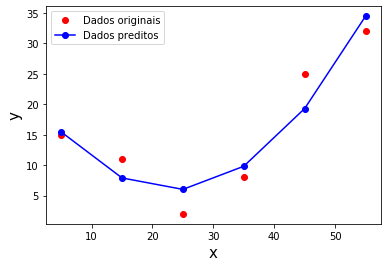

In [22]:
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'bo-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

O coeficiente R2:

In [23]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.8908516262498563


Portanto, para ajustar um modelo com variáveis não lineares, basta gerarmos um novo conjunto de dados inserindo novas colunas aos dados originais e realizar o procedimento de regressão multivariada. Cada coluna inserida contém os dados originais elevados a uma potência definida pelos termos do modelo.

## Ridge regression

Vamos considerar dados sobre propaganda em rádio, televisão e jornais. Estamos interessados em determinar se o investimento em propaganda aumenta as vendas e, em caso afirmativo, qual seria o veículo de divulgação mais vantajoso.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# leitura dos dados
data = pd.read_csv('data/Advertising.csv', header=(0))
# remove nan (Not a Number)
data = data.dropna()
data = data.drop(data.columns[[0]], axis=1) # remove the first column (if useless)
# define a variável de saída
ylabel = data.columns[-1]

print('Número de observações e atributos:',data.shape)
list_labels = list(data.columns)
data.head(10)

Número de observações e atributos: (200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [25]:
# Converte os dados para numpy para facilitar a manipulação
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Ajustando o modelo de regressão múltipla simples.

In [26]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 3.7967972367152183


Notem que esse resultado é o mesmo se aplicarmos a função Ridge com alpha = 0.

In [28]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 3.7967972367152174


Podemos mostrar a predição e os valores originais.

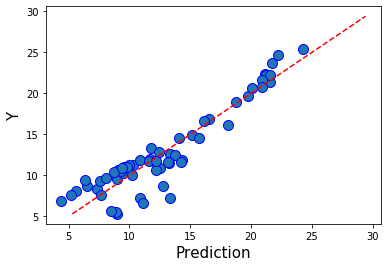

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

O coeficiente R2 quantifica a qualidade do ajuste.

In [30]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.8609466508230368


No modelo ridge regression, temos que o parâmetro $\alpha > 0$. Vamos analisar como o coeficiente R2 varia de acordo com $\alpha$.

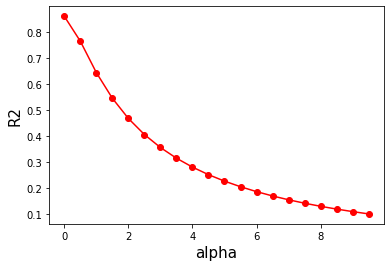

In [31]:
vR2 = []
valpha = []
# variamos os valaores de alpha
for alpha in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = alpha, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

Para $\alpha > 0$, o coeficiente R2 diminui, indicando que o ajuste tradicional, para $\alpha = 0$, resulta em um resultado melhor. 

Ou seja, para esse conjunto de dados, a melhor opção é considerar a regressão linear simples.

### LASSO

Usando os dados anteriores, vamos aplicar o método Lasso (least absolute shrinkage and selection operator) aos dados.

In [32]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('RSME:', RSME)

RSME: 6.064528083772853


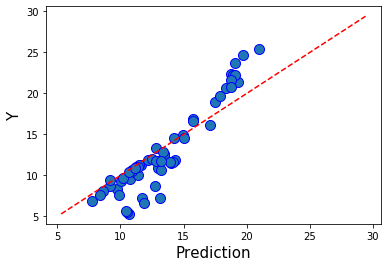

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

In [34]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2:", R2)          # Calculate the test MSE

R2: 0.7778936064660812


Vemos que o valor de R2 é menor do que o obtido nos exemplos anteriores, indicando que para os dados que estamos analisando, a regressão simples oferece o melhor resultado.

Variando alpha, vemos que o coeficiente R2 diminui ainda mais.

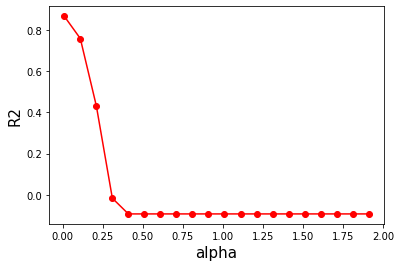

In [35]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

No método Lasso, podemos calcular os coeficientes de modo a selecionar os atributos mais importantes. Se algum atributo apresentar os respectivo coeficiente igual a zero, então esse atributo não contribui para a regressão.

In [36]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: TV, radio, newspaper')
lasso.coef_

Coeficientes: TV, radio, newspaper


array([0.03079952, 0.12648918, 0.        ])

Ou seja, vemos que a variável newspaper recebeu peso igual a zero, indicando que não é importante na predição. Portanto, não vale a pena investir em anúncios em jornais, pois o ganho nas vendas pode ser obtido com investimentos em TV e radio.

## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Considere a base BostonHousing. Compare o coeficiente R2 obtido através de regressão linear múltipla, Lasso e ridge regression. Para os métodos Lasso e ridge regression, faça um gráfico de $\alpha \times$ R2 como foi feito nos exemplos anteriores.

2 - Para os dados gerados pelo código abaixo, ajuste um modelo de regressão não-linear considerando um polinômio de grau 3, conforme feito na aula.

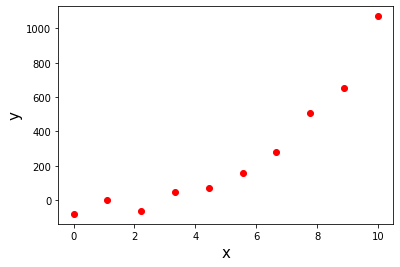

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

N = 10
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

3 - Determine as variáveis que mais influenciam o preço de imóveis em Boston usando Lasso.